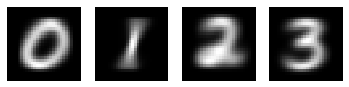

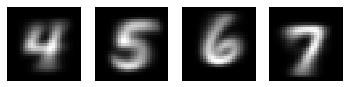

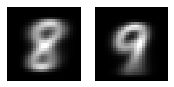

In [1]:
import scipy.io
import numpy 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
 
train_mat = scipy.io.loadmat('data/mnist_train.mat')
train_data = train_mat['images']
train_labels = train_mat['labels']
 
test_mat = scipy.io.loadmat('data/mnist_test.mat')
test_data = test_mat['t10k_images']
test_labels = test_mat['t10k_labels']

meanArray = []
#not the prettiest way to plot but it works...
#140 means 1 row, 4 columns, 0th position. Note I add 1 at the beginning of the loop 
subplot = 140
for x in range(0,10):
    subplot = subplot + 1
    plt.subplot(subplot).axes.get_xaxis().set_visible(False)
    plt.subplot(subplot).axes.get_yaxis().set_visible(False)
    numbers = train_data[:,(train_labels == x).ravel()]
    avgNumbers = numpy.mean(numbers, axis = 1)
    meanArray.append(avgNumbers)
    plt.imshow( avgNumbers.reshape(28,28).T, interpolation='nearest', cmap=matplotlib.cm.gray)
    if (x+1)%4==0:
        subplot = 140
        #Every time you use plt.show() it creates a new plot
        plt.show()



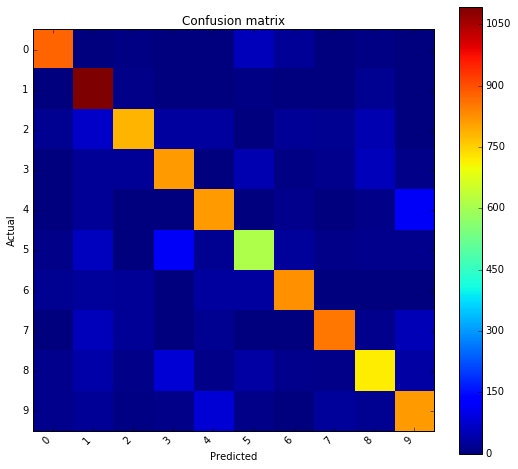

In [2]:
colLen = xrange(len(test_labels))
rowLen = xrange(len(meanArray))

pred_vals = []
act_vals = []
#print colLen
#print rowLen

#$ conda install pandas scikit-learn scipy
#$ pip install pandas_confusion

from pandas_confusion import ConfusionMatrix


for x in colLen:
    act_vals.append(test_labels[x][0])
    means = []
    for y in rowLen:
        means.append(numpy.mean(pow(((test_data[:,x] + meanArray[y])/2) - meanArray[y],2))) #averaging the two. it might be more accurate if we calculate percent error

    #print means
    pred_vals.append(numpy.argmin(means))

confusion_matrix = ConfusionMatrix(act_vals, pred_vals)
confusion_matrix.plot(cmap=matplotlib.cm.jet)

In [3]:
confusion_matrix.print_stats()

Confusion Matrix:

Predicted    0     1    2     3     4    5    6    7    8     9  __all__
Actual                                                                  
0          878     0    7     2     2   58   25    1    7     0      980
1            0  1092   10     3     0    7    3    0   20     0     1135
2           19    71  781    33    31    3   23   18   50     3     1032
3            4    24   25   814     1   49    8   15   58    12     1010
4            1    22    2     0   811    3   16    1   10   116      982
5           11    63    2   118    21  612   27   10   13    15      892
6           18    27   22     0    31   32  827    0    1     0      958
7            2    59   22     1    20    2    0  856   13    53     1028
8           14    39   11    83    12   36   13   10  718    38      974
9           15    22    7    10    83   12    1   27   18   814     1009
__all__    962  1419  889  1064  1012  814  943  938  908  1051    10000


Overall Statistics:

Accuracy:

Confusion Matrix:

Predicted   0    1    2    3    4   5   6    7   8   9  __all__
Actual                                                         
0          84    0    0    0    0   0   1    0   0   0       85
1           0  125    1    0    0   0   0    0   0   0      126
2           1    0  110    0    0   0   1    3   1   0      116
3           0    0    0  101    0   3   0    2   1   0      107
4           0    1    0    0  104   0   0    0   0   5      110
5           0    0    0    1    1  85   0    0   0   0       87
6           1    0    0    0    1   0  85    0   0   0       87
7           0    1    0    2    1   0   0   95   0   0       99
8           1    1    0    2    0   2   0    0  82   1       89
9           0    0    0    1    0   0   0    1   1  91       94
__all__    87  128  111  107  107  90  87  101  85  97     1000


Overall Statistics:

Accuracy: 0.962
95% CI: (0.94821289637803619, 0.97297118401701799)
No Information Rate: ToDo
P-Value [Acc > NIR]: 0.0
Kappa: 0

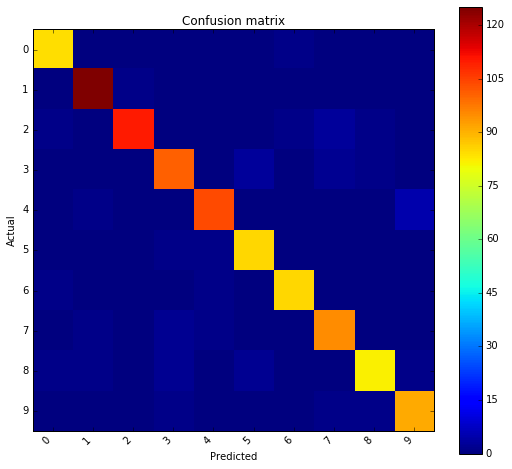

In [6]:
bigTestVals = act_vals[:1000]
colLen = xrange(len(bigTestVals))
rowLen = xrange(len(meanArray))

from math import exp

final_pred = []
for x in colLen:
    sum_predictions = numpy.zeros(10)
    for y in rowLen:
            trainingMatrix = train_data[:,(train_labels == y).ravel()]
            X = test_data[:,x]
            sum_predictions[y] =  numpy.mean(numpy.exp((-1/2 * numpy.sum((((X.reshape(784,1) - trainingMatrix ) * (X.reshape(784,1) - trainingMatrix))), axis = 0).ravel())))
    final_pred.append(numpy.argmax(sum_predictions))

confusion_matrix = ConfusionMatrix(bigTestVals, final_pred)
confusion_matrix.plot(cmap=matplotlib.cm.jet)

print confusion_matrix.print_stats()